<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/Borrador_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [493]:
import pandas as pd
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
import statistics as stats
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chapter 4&5
from sklearn.decomposition import PCA

# Chapter 6
from sklearn.decomposition import IncrementalPCA

# Chapter 7
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

from mpl_toolkits.mplot3d import Axes3D
#from pydiffmap import diffusion_map as dm
#from pydiffmap.visualization import data_plot

# Chapter 8
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import pandas as pd
url="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/ParaRosana.xlsx?raw=true"
datos=pd.read_excel(url)
url1="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/ParaRosanatest.xlsx?raw=true"
test=pd.read_excel(url1)
test

Ni     Co     Fe   SiO2   MgO  Al2O3  Cr2O3    Mn  Cu  Zn  Na   K Frente
0  1.19  0.151  41.96   6.96  1.64   5.03   1.98  0.71 NaN NaN NaN NaN     YN
1  1.32  0.074  28.71  21.43  7.19   2.71   1.27  0.57 NaN NaN NaN NaN     YN
2  1.31  0.169  42.99   7.65  1.20   7.63   1.95  1.01 NaN NaN NaN NaN     YN

In [494]:

datos


Ni     Co     Fe   SiO2   MgO  Al2O3  Cr2O3    Mn    Cu    Zn    Na  \
0    1.23  0.130  42.01   8.46  2.98   4.85   2.00  1.00  0.02  0.03  0.21   
1    0.93  0.050  41.59   4.05  0.52   6.05   1.46  0.36  0.02  0.02  0.22   
2    1.10  0.070  44.80   5.87  0.40  14.41   1.35  0.55  0.02  0.02  0.22   
3    1.14  0.080  43.96   5.12  0.96   8.09   1.25  0.57  0.02  0.02  0.22   
4    1.11  0.090  43.98   4.85  0.40   9.99   1.30  0.64  0.02  0.02  0.15   
..    ...    ...    ...    ...   ...    ...    ...   ...   ...   ...   ...   
410  1.58  0.104  26.91  23.36  8.03   2.59   1.22  0.47   NaN   NaN   NaN   
411  1.41  0.184  44.37   6.66  1.46   6.23   1.97  0.85   NaN   NaN   NaN   
412  1.19  0.151  41.96   6.96  1.64   5.03   1.98  0.71   NaN   NaN   NaN   
413  1.32  0.074  28.71  21.43  7.19   2.71   1.27  0.57   NaN   NaN   NaN   
414  1.31  0.169  42.99   7.65  1.20   7.63   1.95  1.01   NaN   NaN   NaN   

        K Frente  
0    0.01     YS  
1    0.01     CE  
2    0.01     CE  
3    0.00     CE  
4    0.01     CE  
..    ...    ...  
410   NaN     YS  
411   NaN     CE  
412   NaN     YS  
413   NaN     YN  
414   NaN     YN  

[415 rows x 13 columns]

In [495]:
datos = datos.dropna(how='all')
datos2 = datos.fillna(0)
datos2

Ni     Co     Fe   SiO2   MgO  Al2O3  Cr2O3    Mn    Cu    Zn    Na  \
0    1.23  0.130  42.01   8.46  2.98   4.85   2.00  1.00  0.02  0.03  0.21   
1    0.93  0.050  41.59   4.05  0.52   6.05   1.46  0.36  0.02  0.02  0.22   
2    1.10  0.070  44.80   5.87  0.40  14.41   1.35  0.55  0.02  0.02  0.22   
3    1.14  0.080  43.96   5.12  0.96   8.09   1.25  0.57  0.02  0.02  0.22   
4    1.11  0.090  43.98   4.85  0.40   9.99   1.30  0.64  0.02  0.02  0.15   
..    ...    ...    ...    ...   ...    ...    ...   ...   ...   ...   ...   
410  1.58  0.104  26.91  23.36  8.03   2.59   1.22  0.47  0.00  0.00  0.00   
411  1.41  0.184  44.37   6.66  1.46   6.23   1.97  0.85  0.00  0.00  0.00   
412  1.19  0.151  41.96   6.96  1.64   5.03   1.98  0.71  0.00  0.00  0.00   
413  1.32  0.074  28.71  21.43  7.19   2.71   1.27  0.57  0.00  0.00  0.00   
414  1.31  0.169  42.99   7.65  1.20   7.63   1.95  1.01  0.00  0.00  0.00   

        K Frente  
0    0.01     YS  
1    0.01     CE  
2    0.01     CE  
3    0.00     CE  
4    0.01     CE  
..    ...    ...  
410  0.00     YS  
411  0.00     CE  
412  0.00     YS  
413  0.00     YN  
414  0.00     YN  

[415 rows x 13 columns]

In [524]:
X = datos2.drop(['Frente'], axis=1)
Y= datos2['Frente']
sc = StandardScaler()
X = X.values
X_std =  sc.fit_transform(X)  
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [469]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)


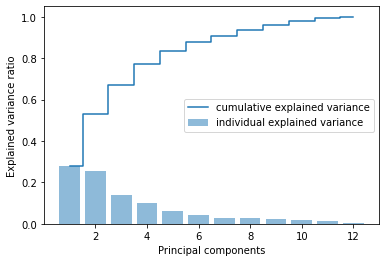

In [470]:
plt.bar(range(1,len(var_explained)+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_explained)+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [525]:
pca = PCA(n_components = 10)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.explained_variance_ratio_

array([0.27688031, 0.25526741, 0.13725174, 0.10240734, 0.06340652,
       0.04445136, 0.02901222, 0.0273882 , 0.02401415, 0.01996053])

In [520]:
pca.explained_variance_ratio_.sum()

0.9800397651605659

In [521]:
pca = PCA(n_components = 0.90)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.n_components_

9

In [522]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10).fit(X)
principal_comps = pca.transform(X)
pca_db = pd.DataFrame(data = principal_comps, columns=['pca1', 'pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
pca_db

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0    -1.521931 -1.296168 -0.647518 -1.926820  0.674046  0.264385  0.071695   
1    -4.789316  2.539943  0.481571 -1.650028 -0.129636 -0.417256 -0.172592   
2    -6.905345 -0.635518  3.849915  5.918359 -0.622877 -0.066831 -0.373241   
3    -5.921750  0.173972  0.832674  0.376790 -0.333564 -0.119843 -0.263655   
4    -6.475358  0.498526  1.950034  1.901408 -0.447727 -0.046574 -0.245071   
..         ...       ...       ...       ...       ...       ...       ...   
410  20.255519 -2.734180  1.301312 -2.756901 -0.123141  0.090544 -0.307756   
411  -4.939243 -1.332011  0.206388 -1.178232  0.532192  0.252738 -0.216274   
412  -2.836982  0.008076  0.076633 -2.242731  0.535415  0.013708 -0.086063   
413  17.504558 -2.424343  1.160445 -2.880258 -0.093592  0.011992 -0.066454   
414  -3.572730 -1.040227  1.497253 -0.056848  0.335705  0.358701 -0.070682   

         pca8      pca9     pca10  
0   -0.028688  0.210628 -0.008975  
1   -0.011251  0.199991 -0.024837  
2    0.004894  0.136337 -0.024086  
3   -0.009219  0.181067 -0.028168  
4    0.003178  0.101799 -0.014545  
..        ...       ...       ...  
410 -0.022827 -0.046560 -0.009595  
411 -0.046379 -0.026537 -0.012671  
412 -0.035279 -0.015067 -0.010135  
413  0.015337 -0.028736 -0.006665  
414 -0.015715 -0.028915 -0.008946  

[415 rows x 10 columns]

In [526]:
# Adicionemos ahora la columna con la clase correcta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


FRENTE_MAPEO = {'YS':1, 'CE':2,'YN':3,'PG':4 ,'NA':5,'0':6}

Y = Y.map(FRENTE_MAPEO).astype(int)

pca_db['class']=Y

pca_db

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0    -1.521931 -1.296168 -0.647518 -1.926820  0.674046  0.264385  0.071695   
1    -4.789316  2.539943  0.481571 -1.650028 -0.129636 -0.417256 -0.172592   
2    -6.905345 -0.635518  3.849915  5.918359 -0.622877 -0.066831 -0.373241   
3    -5.921750  0.173972  0.832674  0.376790 -0.333564 -0.119843 -0.263655   
4    -6.475358  0.498526  1.950034  1.901408 -0.447727 -0.046574 -0.245071   
..         ...       ...       ...       ...       ...       ...       ...   
410  20.255519 -2.734180  1.301312 -2.756901 -0.123141  0.090544 -0.307756   
411  -4.939243 -1.332011  0.206388 -1.178232  0.532192  0.252738 -0.216274   
412  -2.836982  0.008076  0.076633 -2.242731  0.535415  0.013708 -0.086063   
413  17.504558 -2.424343  1.160445 -2.880258 -0.093592  0.011992 -0.066454   
414  -3.572730 -1.040227  1.497253 -0.056848  0.335705  0.358701 -0.070682   

         pca8      pca9     pca10  class  
0   -0.028688  0.210628 -0.008975      1  
1   -0.011251  0.199991 -0.024837      2  
2    0.004894  0.136337 -0.024086      2  
3   -0.009219  0.181067 -0.028168      2  
4    0.003178  0.101799 -0.014545      2  
..        ...       ...       ...    ...  
410 -0.022827 -0.046560 -0.009595      1  
411 -0.046379 -0.026537 -0.012671      2  
412 -0.035279 -0.015067 -0.010135      1  
413  0.015337 -0.028736 -0.006665      3  
414 -0.015715 -0.028915 -0.008946      3  

[415 rows x 11 columns]

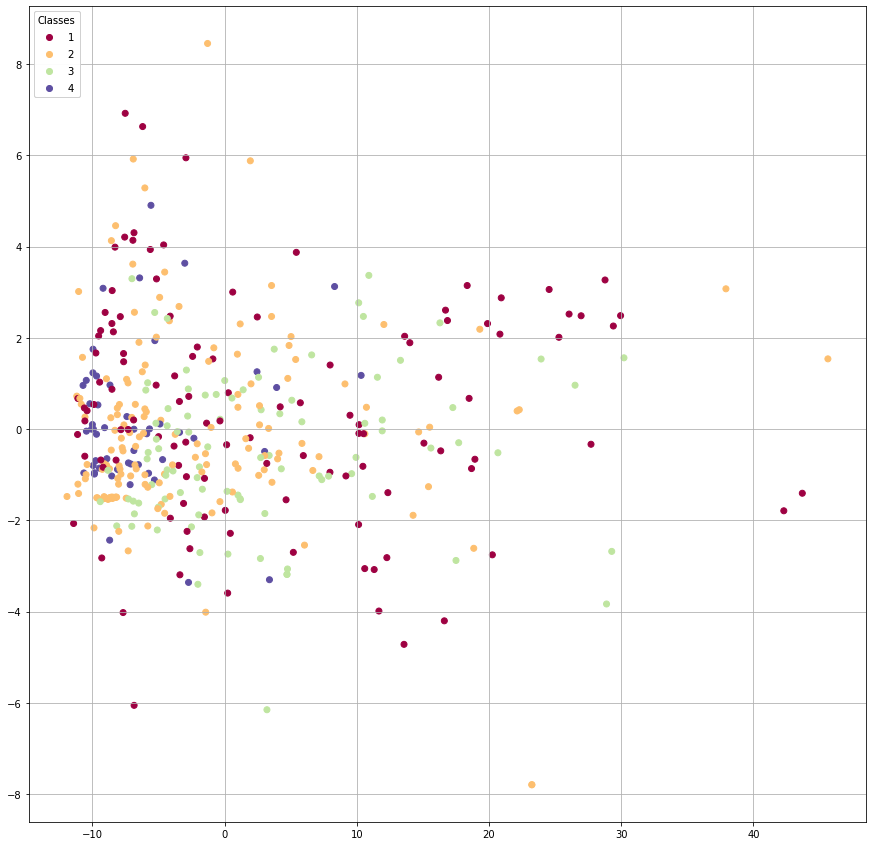

In [539]:
# y visualicemos el resultado

fig, ax = plt.subplots(figsize=(15, 15))
scatter = ax.scatter(pca_db['pca1'], pca_db['pca4'],c=pca_db['class'], cmap="Spectral")
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")
ax.add_artist(legend1)
ax.grid(True)
plt.show()

In [534]:
y_test= test['Frente']
y_test=y_test.map(FRENTE_MAPEO).astype(int)
x_test= test.drop(['Frente'], axis=1)
x_test =x_test.fillna(0)
y_test,x_test


(0    3
 1    3
 2    3
 Name: Frente, dtype: int64,
      Ni     Co     Fe   SiO2   MgO  Al2O3  Cr2O3    Mn   Cu   Zn   Na    K
 0  1.19  0.151  41.96   6.96  1.64   5.03   1.98  0.71  0.0  0.0  0.0  0.0
 1  1.32  0.074  28.71  21.43  7.19   2.71   1.27  0.57  0.0  0.0  0.0  0.0
 2  1.31  0.169  42.99   7.65  1.20   7.63   1.95  1.01  0.0  0.0  0.0  0.0)

In [535]:
# Entrenemos el modelo
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=10000000, tol=1e-3)
model.fit(x_train, y_train)

SGDClassifier(max_iter=10000000)

In [536]:
from sklearn import metrics
predicted_train = model.predict(x_train)
metrics.accuracy_score(y_train, predicted_train)

0.8825301204819277

In [537]:
#Llevando los componentes de pruba al mismo redimensionamiento que los de entrenamiento
x_reduced=pca_db
x_train, x_test, y_train, y_test = train_test_split(x_reduced, Y, test_size = 0.2, random_state = 1) 


In [538]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=6), SGDClassifier(max_iter=1000, tol=1e-3))    

pipe.fit(x_train, y_train)
pipe_test = pipe.predict(x_test)
metrics.accuracy_score(y_test, pipe_test)

0.5421686746987951